In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import cv2
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.animation as animation
from matplotlib import cm
from scipy import ndimage
import math
import csv
import time

In [7]:
#%matplotlib inline
%matplotlib notebook
#Set up figure size and DPI for screen demo
plt.rcParams['figure.figsize'] = (6,4)
plt.rcParams['figure.dpi'] = 150

In [3]:
from scipy.spatial.transform import Rotation as R

def getAxisVectors(x, y, z):
    r = R.from_euler('xyz', [x,y,z], degrees=True)
    return np.array(r.as_matrix())

In [4]:
def updateOrientation(rotationMatrix):
    global quiver_x
    global quiver_y
    global quiver_z
    
    quiver_x.remove()
    quiver_y.remove()
    quiver_z.remove()
    print(rotationMatrix)
    x = rotationMatrix[0]
    y = rotationMatrix[1]
    z = rotationMatrix[2]
    quiver_x = ax.quiver(0,0,0,x[0],x[1],x[2],color='g')
    quiver_y = ax.quiver(0,0,0,y[0],y[1],y[2],color='r')
    quiver_z = ax.quiver(0,0,0,z[0],z[1],z[2],color='b')

In [5]:
def animate(j):
    #if j % 32 != 0:
       # return
    read_file = open('D:/Research/UMass Computer Vision Lab/Rotation Estimation/cameraimu_data_repo/visualization/data/VID_20220612_035819_processed.csv', 'r')
    reader = csv.reader(read_file)
    
    orientation = next((x for i, x in enumerate(reader) if i == j), None) #orientation at i'th row
    rotationMatrix = getAxisVectors(x=float(orientation[0]), y=float(orientation[1]),z=float(orientation[2]))
    updateOrientation(rotationMatrix)
    print(rotationMatrix)

# Visualization based from CSV file

### Angle to vector

<IPython.core.display.Javascript object>


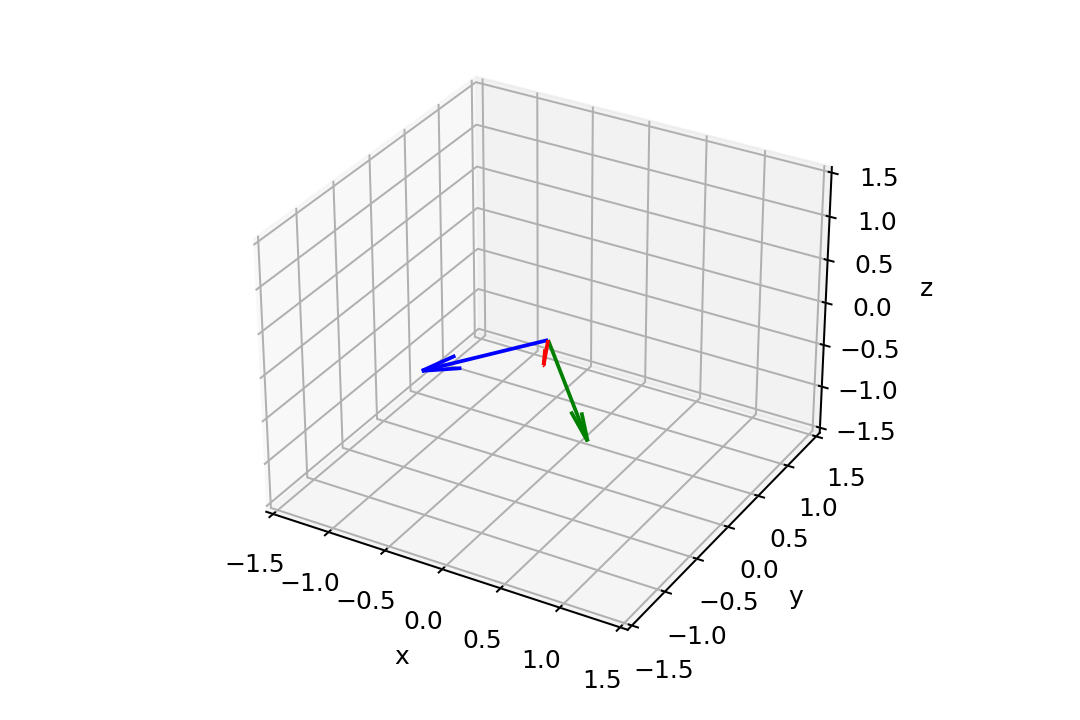

In [10]:
fig = plt.figure()
plt.rcParams["figure.autolayout"] = True
ax = fig.add_subplot(111, projection='3d')

ax.set_xlim3d([-1.5,1.5])
ax.set_ylim3d([-1.5,1.5])
ax.set_zlim3d([-1.5,1.5])

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

"""Initiation orientation"""
quiver_x = ax.quiver(0,0,0,1,0,0,color='g')
quiver_y = ax.quiver(0,0,0,0,1,0,color='r')
quiver_z = ax.quiver(0,0,0,0,0,1,color='b')

"""Animation"""
ani = animation.FuncAnimation(fig, animate, frames=128, interval=0.0003)
fig.tight_layout()
plt.show()